<div style=float:left>
<img src="images/enso-math.png" width="500"/>
</div>

# The mathematics of El Niño
## Lecture 1
<div style=float:left>
<img src="images/RISE_slideshow_icon.png" width="40"/>
</div>

Today
1. Class structure and logistics
2. Course overview
2. ENSO = EN + SO
    * EN = El Niño
    * SO = Southern Oscillation
    * Reading assignment?
    * Clarke chapter 1
    * Philander [Introduction](docs/Philander1990/01-Introduction.pdf).
    * Script 1 is pretty good. Add supporting material here.

### Structure
1. Two lectures per week. Reading assignments.
    1. Theory (lecture, reading discussion)
    2. Thursday -- Practical data activity (introduction to the homework)
2. Homework approximately weekly
    1. Usually in the form of a Jupyter notebook
    2. Turn in using github or something
3. Final project
    1. Proposal due week 9 (Nov 5)
    1. Detailed outline due week 12 (Nov 24)
    2. Project presentations during the last week of class (Dec 8 & 10)
    3. Final report due day of scheduled final (Dec 17)
    4. Reproduce/extend published work – original research (depending on ambition)

Grading: 40% homework, 20% participation, 40% project.  
Questions?    

### Goals/Outcomes
1. Learn basic properties of the El Nino-Southern Oscilation.
2. Do some applied math/climate science data analysis

### Course overview
1. ENSO (El Niño - Southern Oscillation)
    1. What is ENSO?
    2. How is ENSO predicted?
    3. What are impacts of ENSO?
2. Math
    1. Descriptive statistics 
    2. Time series modeling
    3. Multivariate statistical analysis
3.  Lectures and activities use Python in Jupyter notebooks.
4. ENSO, math, and python material  will be self contained. 

### One-sentence summary
ENSO is the dominent mode of predictable climate variability on seasonal time scales and its global impacts provide the scientific basis for short-range climate predictions.  
In this class you will learn what those words mean.

### Some resources
1. The [ENSO blog](https://www.climate.gov/news-features/department/enso-blog) 
![ENSO blog](https://www.climate.gov/sites/default/files/logo.png)

2. [The El Niño-Southern oscillation phenomenon](https://clio.columbia.edu/catalog/9073864) by Edward S. Sarachik and Mark A. Cane. 2010.

3. [An Introduction to the Dynamics of El Nino and the Southern Oscillation](https://www.elsevier.com/books/an-introduction-to-the-dynamics-of-el-nino-and-the-southern-oscillation/clarke/978-0-08-056083-0) by Allen Clarke. 2008.

4. [El Niño, La Niña, and the southern oscillation](https://clio.columbia.edu/catalog/11425183) by S. George Philander. 1990.

4. [Nonlinear physical oceanography: a dynamical systems approach to the large scale ocean circulation and El Niño](https://clio.columbia.edu/catalog/7769085) by  Henk A. Dijkstra

5. Python information is everywhere. Notebooks on python, numpy, and matlibplot from APAM Profs. Mandli and Speigelman https://github.com/mspieg/intro-numerical-methods


# What is ENSO?
<div>
<img src="images/TGMM_Blind_Elephant.png" width="800"/>
</div>

<div style="text-align: right"> <a href=https://fs.blog/elephant/>source</a> </div>


### It's big and has many parts.
Today I will:
1. Introduce El Niño and the Southern Oscillation in a nutshell. 
2. Give some historical background perspective (Clarke Chapter 1, Philander Introduction, Cane review paper)
    1. El Niño, a coastal phenomenon noted in the 1890's. Ocean.
        - Climate and anomaly
    2. The Southern Oscillation, a pattern of world weather (1920's Walker). Atmosphere.
    3. El Niño and the Southern Oscillation are part of the same thing. Bjerknes 1967
    4. First sucessful prediction by Columbia scientists in 1986.
    5. Global impacts

# ENSO in a nutshell
"Once about every four years, the <u>sea surface temperature</u> (SST) in the eastern Pacific increases by a few degrees over a period of about one year. These events are called **El Niño** (literally: the little boy), referring to the Christmas Child, since the maximum of the event is usually around December. This phenomenon arises through large scale interaction between the Pacific ocean and the overlying atmosphere and is associated with variations in the equatorial surface winds. Normally, the equatorial Pacific surface winds, the trade winds, are directed westward and are driven by a pressure difference between a high pressure region in the east (e.g., at Tahiti) and a low pressure region in the west (e.g., at Darwin). During an El Niño, the pressure is lower than normal in Tahiti and higher than normal in Darwin. These variations in <u>atmospheric pressure</u> are known as the **Southern Oscillation**. (Philander, 1990). The El Niño/Southern Oscillation (ENSO) phenomenon is the most prominent interannual signal in the climate system and has large effects on the weather, even far outside the Pacific basin." Dijkstra, (2000).


<table>
<tr>
    <td> Sea surface temperature El Niño 1997 <img src="images/iconic_ENSO_elNino_lrg.jpg" alt="El Nino" style="width: 800px;"/> </td>
    <td> Sea surface temperature La Niña 1988 <img src="images/iconic_ENSO_laNina_lrg.jpg" alt="La Nina" style="width: 800px;"/> </td>
</tr>
</table>    

# 1. EN = El Niño
<div>
<img src="images/Peru.png" width="800"/>
</div>

Our story begins in the port of Paita in northern Peru. 

For most of the year, the coastal water is cold and the current flows northward. In (northern hemisphere) winter, the water warms. Fishermen since at least the 19th century had called this warm current the current of *'El Niño'* (the Christ child) because of its appearance around Christmas.

In some years, this current is more noticeable and is accompanied by unusual climate conditions. 1891 was such an El Niño year.
<div>
<img src="images/Cane_rev_1891a.png" width="800"/>
</div>
Other scientists had reported on the El Niño counter-current and Peru climate anomalies, but the El Nino of 1891 was an exceptionally strong event.        
<div>
<img src="images/Cane_rev_1891b.png" width="800"/>
</div>

<div style="text-align: right"><small> Cane, M. A. (1986). El Niño. Annual Review of Earth and Planetary Sciences, 14(1), 43-70.</a> </div>

Key points
* Southern hemisphere summer = northern hemisphere winter
* Counter-current flowing southward
* Observed near the coast
* Large impacts on the local temperature and rainfall
    * Heavy rain in normally desert coastal area
    

The climate (or **climatology**) is the weather that happens every year on average.  
Anomalous conditions (or **anomalies**) are the difference between the climatology and what happens.

Climatology is what you expect, anomalies are what you get.

In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from datetime import datetime
months =[datetime(2019, imon, 1) for imon in np.arange(1,12+1)]
month_str = [date_obj.strftime('%b') for date_obj in months]
m_str = [w[0] for w in month_str];

In [3]:
XY_str = 'X/240/310/RANGE/Y/-30/30/RANGE/'
sst_climo_url = 'https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/T/(Jan%201981)/(Dec%202010)/RANGE/yearly-climatology/' + XY_str + 'zlev/removeGRID/T/(days%20since%201960-01-01)streamgridunitconvert/dods'
sst_climo_ds = xr.open_dataset(sst_climo_url)

/Users/tippett/miniconda3/envs/pangeo/lib/python3.6/site-packages/xarray/plot/facetgrid.py:373: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()
/Users/tippett/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/tippett/miniconda3/envs/pangeo/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


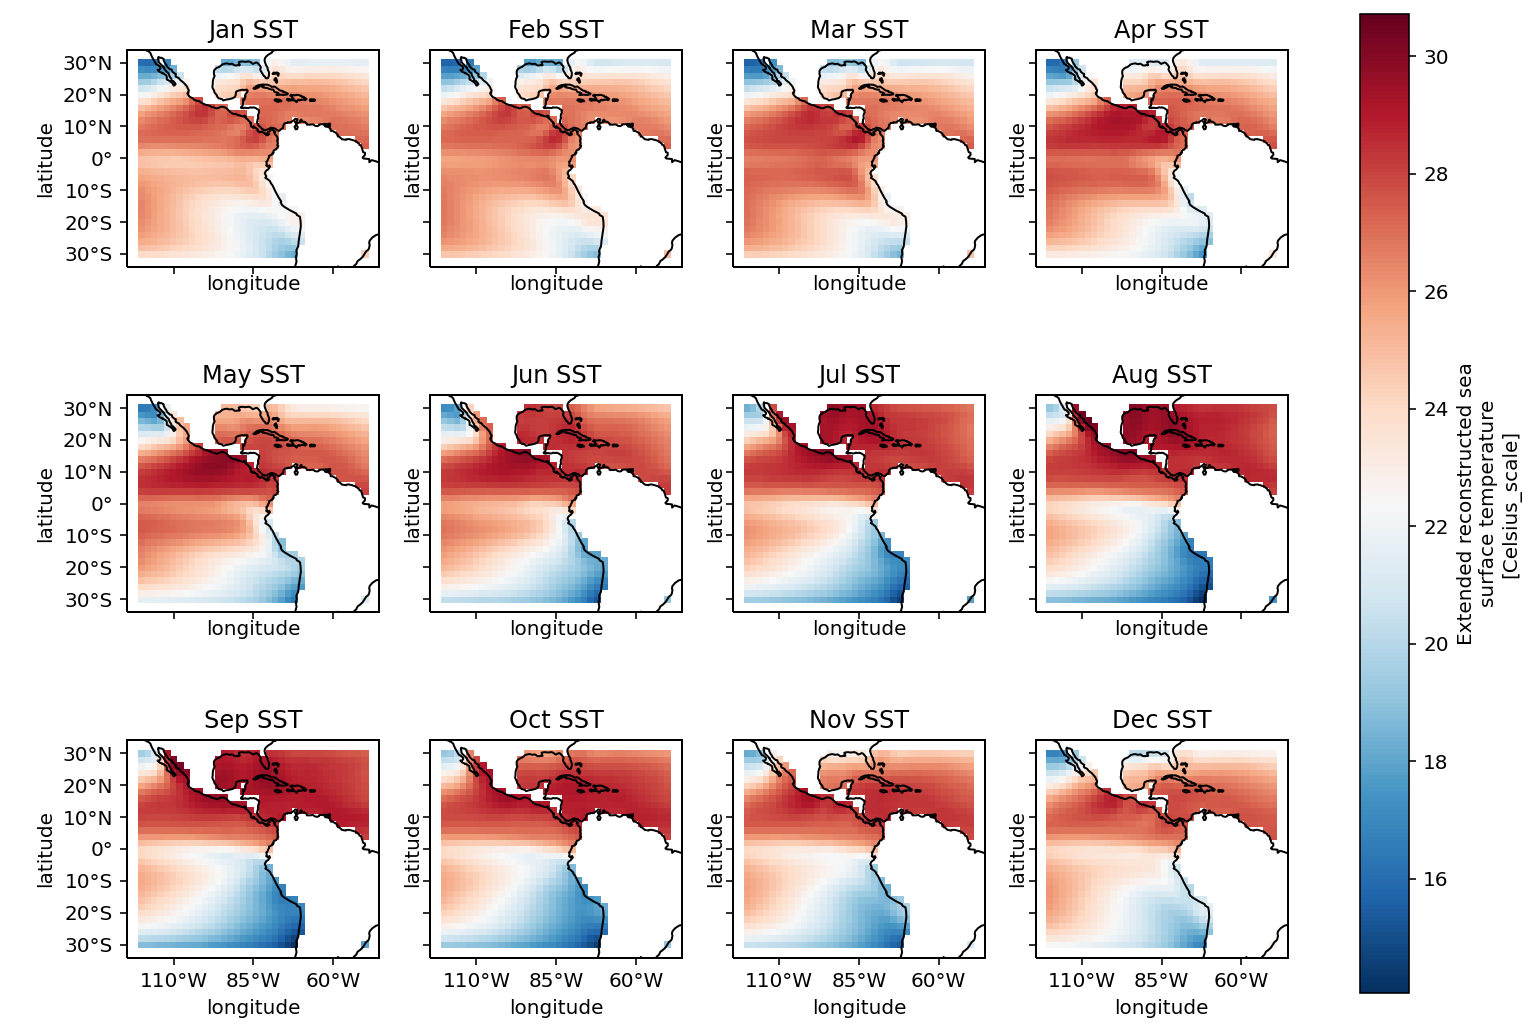

In [4]:
g = sst_climo_ds.sst.plot.pcolormesh(x='X', y='Y', col='T', col_wrap=4, cmap='RdBu_r', subplot_kws={'projection': ccrs.PlateCarree()}, infer_intervals=True);
for ii, ax in enumerate(g.axes.flat):
    ax.set_title(month_str[ii] + ' SST')
    ax.coastlines()
    ax.set_xticks(np.arange(200,325,25)-360)
    ax.set_yticks(np.arange(-30,30+10,10))
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

### Average sea surface temperature (SST) by month of the year (1981-2010)
Note warmer (red) values starting in January.

/Users/tippett/miniconda3/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


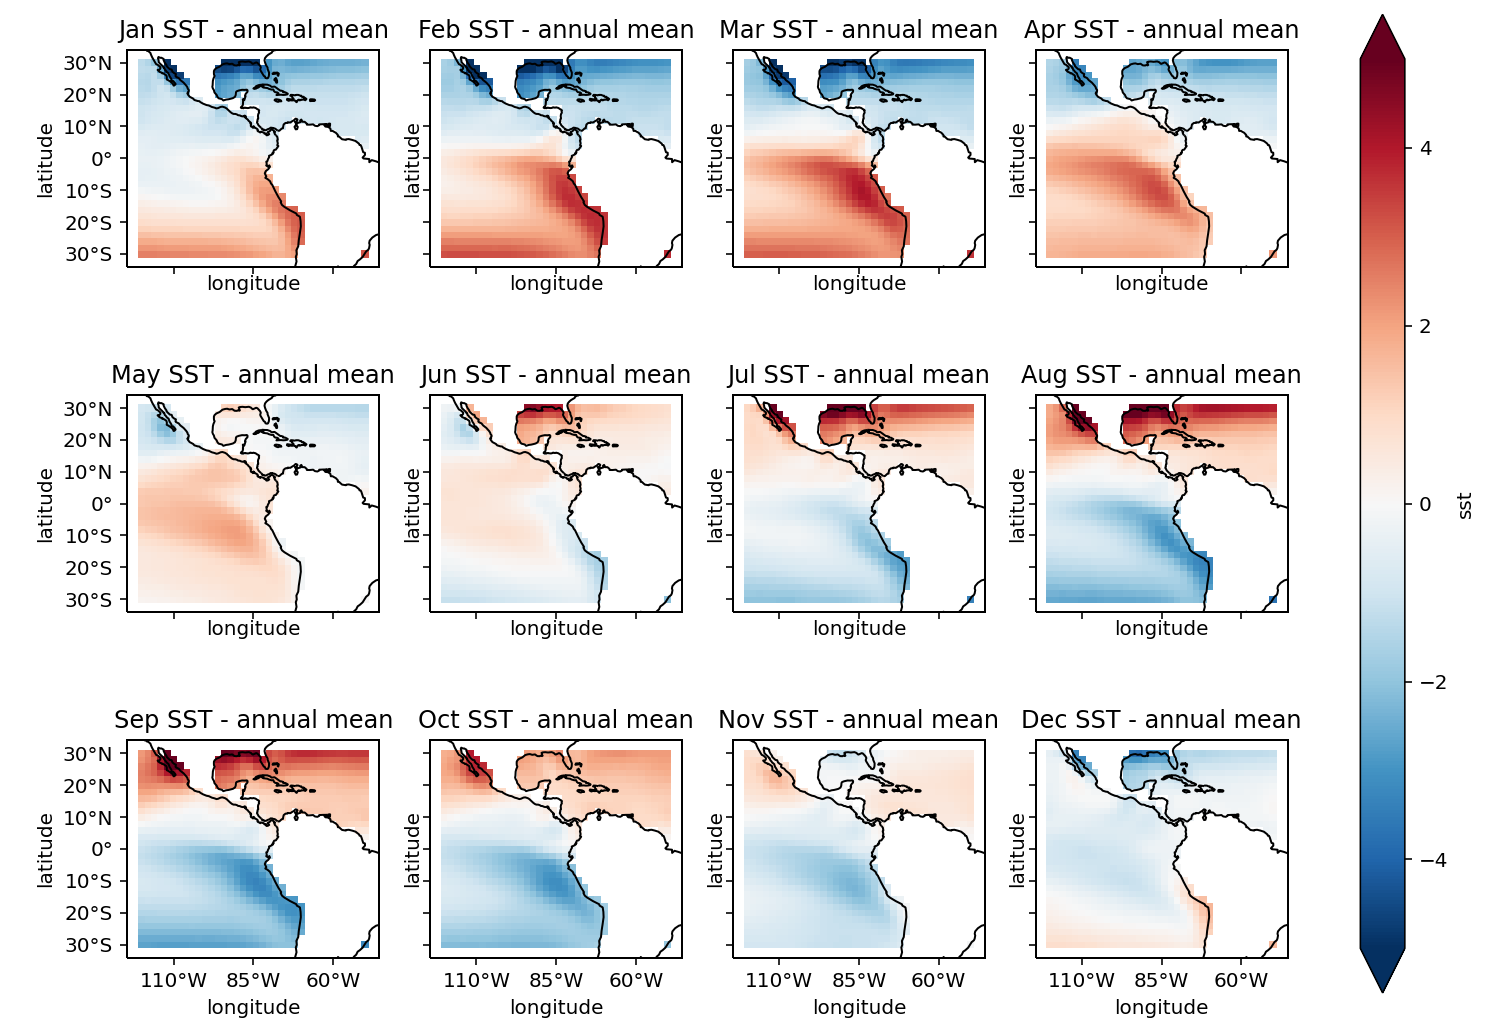

In [5]:
anom = sst_climo_ds.sst - sst_climo_ds.sst.mean('T');
g = anom.plot.pcolormesh(x='X', y='Y', col='T', col_wrap=4, vmin=-5, cmap='RdBu_r', subplot_kws={'projection': ccrs.PlateCarree()}, infer_intervals=True);
for ii, ax in enumerate(g.axes.flat):
    ax.set_title(month_str[ii] + ' SST - annual mean')
    ax.coastlines()
    ax.set_xticks(np.arange(200,325,25)-360)
    ax.set_yticks(np.arange(-30,30+10,10))
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

### Average SST by month of the year - annual mean (1981-2010)

Questions
1. What are we looking at?
2. Where did the data come from?
3. Did those Peruvians in 1891 have access to this data?
4. Were the impacts of El Niño limited to the western coast of South America?

# 2. SO = The Southern Oscillation
<table>
<tr>
    <td> <img src="images/WorldMap.jpg" alt="El Nino" style="width: 800px;"/> </td>
    <td> <img src="images/LateVictorian.png" alt="La Nina" style="width: 200px;"/> </td>
</tr>
</table>    

Meanwhile about a decade earlier in 1877 there had been a failure of the Indian Monsoon. There was drought and famine (Great famine of 1876-78). The death toll was estimated at 5.5 million.

Henry Blanford was the first head in 1875 of what came to be the India Meteorological Department (IMD).

He was asked to make monsoon forecasts, and he did, basing his forecasts on the thickness and extent of Himalayan snow. This was an observed association (correlation). In fact, correlation was just being invented. Galton, F. (1890).

Sir Gilbert Walker was the 2nd IMD director (1904-24). Walker was aware of a seesaw of atmospheric pressure across the Indo-Pacific region, which he call the Southern Oscillation. 

<div>
<img src="images/WalkerWW5a.png" width="800"/>
</div>
Walker correlated weather measurements from all over the world. 
<div>
<img src="images/WalkerWW5b.png" width="800"/>
</div>

The Souther Oscillation was one of the patterns of world weather that he examined. Walker used sea-level pressure (SLP) at Darwin, Australia as part of a Southern Oscillation index. 
<div>
<img src="images/WalkerWW5c1.png" width="800"/>
</div>
<div>
<img src="images/WalkerWW5c2.png" width="800"/>
</div>

<div style=float:left>
<img src="images/WalkerWW5d.png" width="600"/>
</div>
A map of the correlation of Walker's Southern Oscillation index with surface pressure, temperature and rainfall.

Today the Southern Oscillation Index is based on the SLP difference between Darwin and Tahiti.

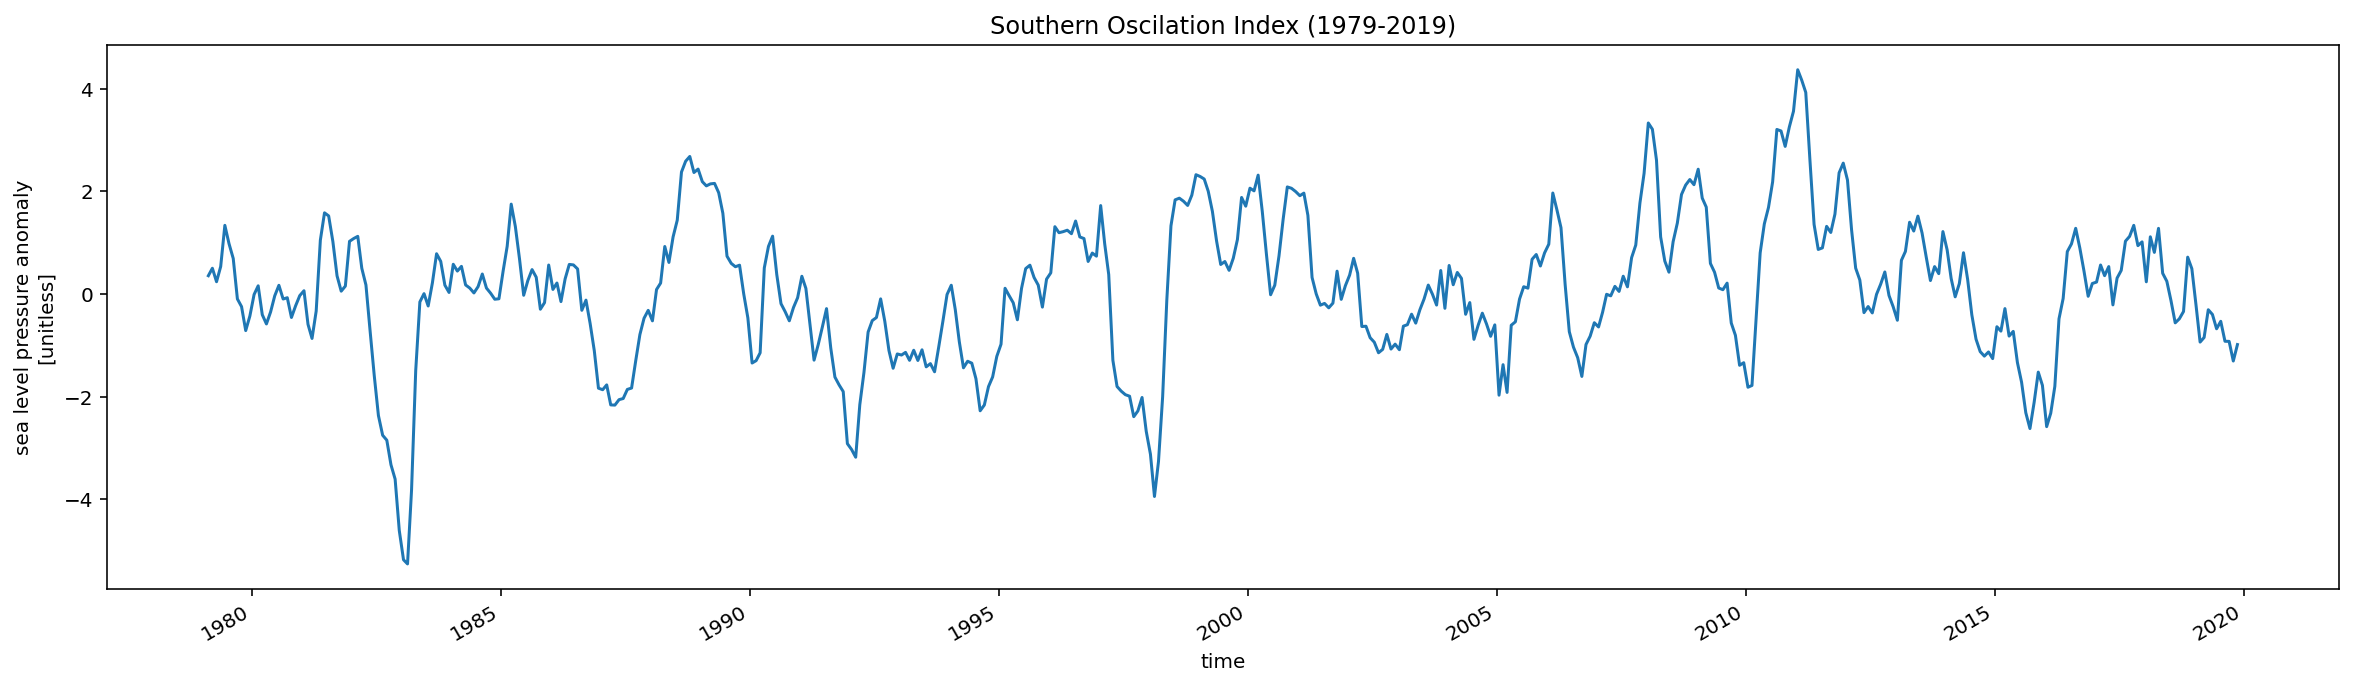

In [6]:
soi_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.Indices/.soi/.c8110/.anomaly/T/(Jan%201979)/(Dec%202019)/RANGE/T/3/runningAverage/'
t_fix ='T/(days%20since%201960-01-01)streamgridunitconvert/'
soi_ds = xr.open_dataset(soi_url + t_fix + 'dods')
fig, ax = plt.subplots(figsize=(20,5))
soi_ds.anomaly.plot();
plt.title('Southern Oscilation Index (1979-2019)');

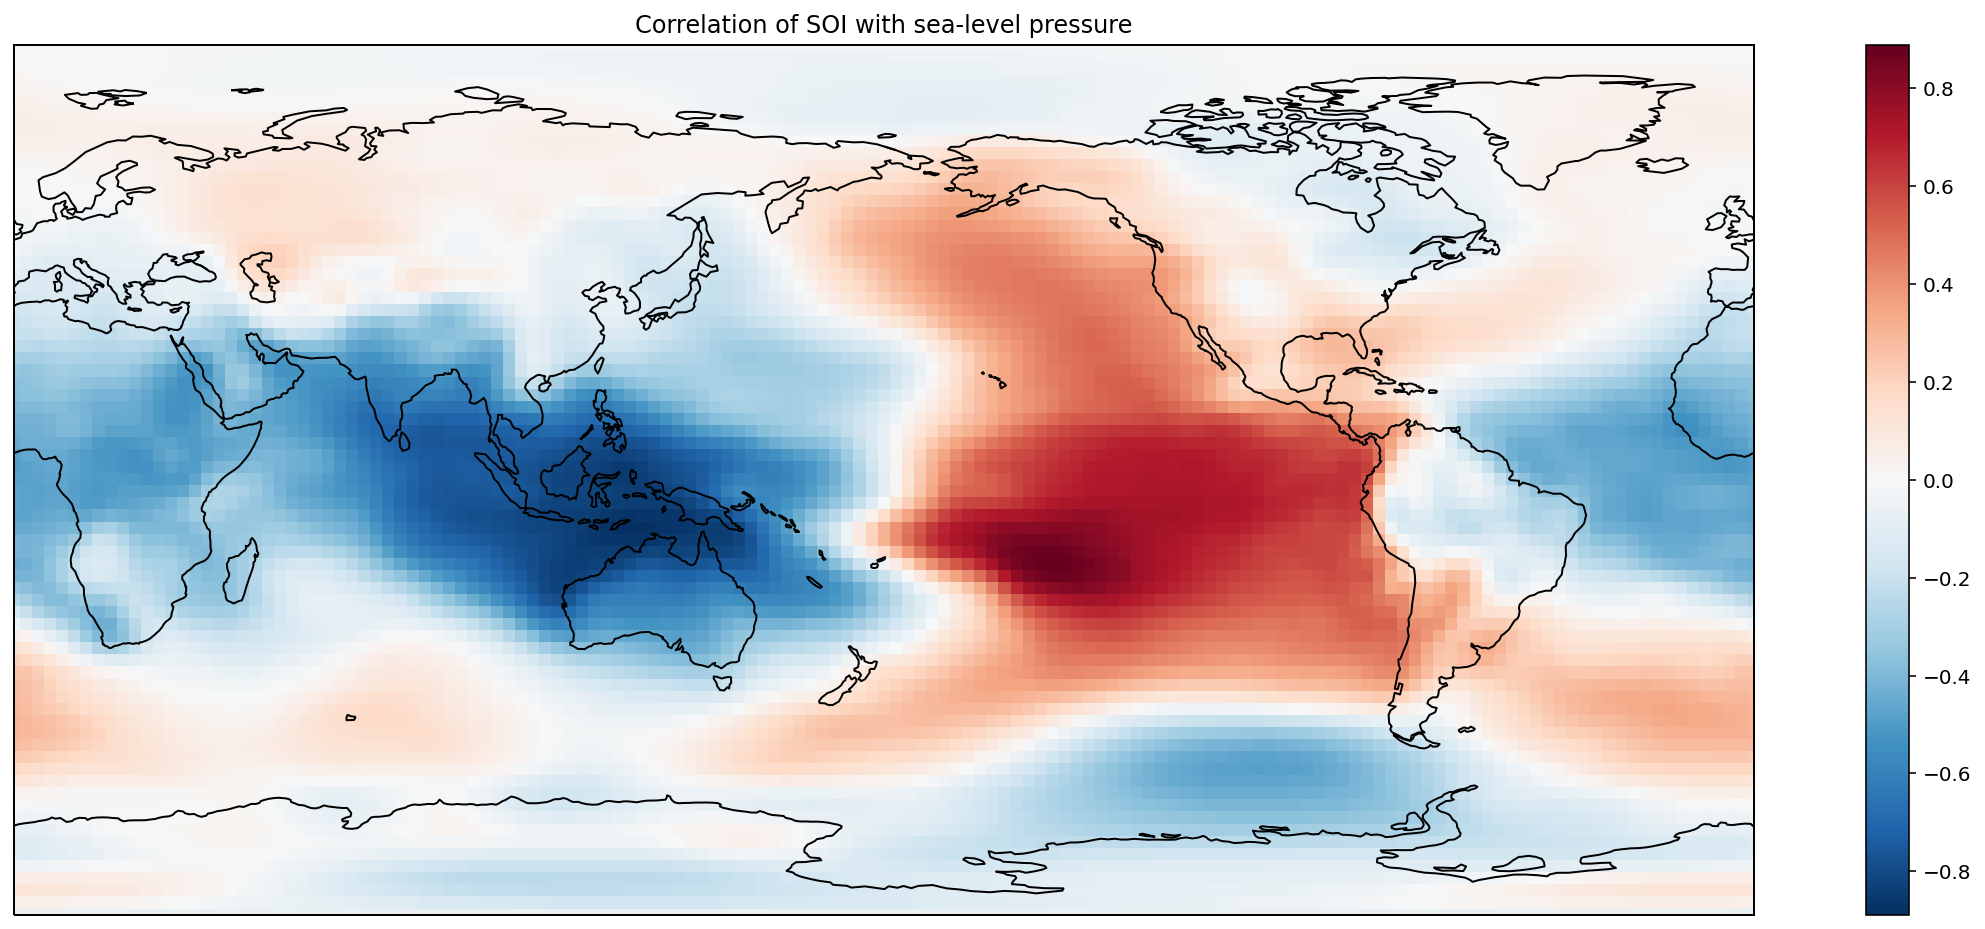

In [7]:
slp_url ='http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Intrinsic/.MSL/.pressure/T/%28Jan%201979%29%28Dec%202019%29RANGE/yearly-anomalies/T/3/runningAverage/'
slp_ds = xr.open_dataset(slp_url + t_fix + 'dods')
soi_slp_cor = xr.corr(slp_ds.pressure,soi_ds.anomaly,dim='T')

proj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(20,8))
ax = plt.subplot(projection=proj)

soi_slp_cor.plot(transform=ccrs.PlateCarree())
ax.coastlines();
plt.title('Correlation of SOI with sea-level pressure');

<div>
<img src="images/WalkerObitOuch.png" width="800"/>
</div>

# El Niño + Southern Oscillation = ENSO
Bjerknes 1969

"During the last two years of Walker's life, there were extensive the observations in the atmosphere and tropical Pacific Ocean during 1957-58, the International Geophysical Year. As it happened, a major El Nino occurred in those years. (Coincidentally, they were also the last two years of Sir Gilbert Walker's life.) It is implausible that a local coastal warming could cause global changes in the atmosphere, but the 1957 data showed that the rise in sea-surface temperature (SST) extended along the equator from the South American coast to the date line (cf Figure 2). Bjerknes suggested that this feature was common to all El Nino events ; he was correct, and the term "El Nino" is now often used to denote the basin-scale oceanic changes. In his account of the connection between the ocean and atmosphere, the coastal events constituting the narrow definition of EI Nino are incidental to the important oceanic change: the warming of the tropical Pacific over a quarter of the circumference of theEarth.
Bjerknes suggested a tropical coupling between El Nino and the Southern Oscillation ; he also hypothesized a link between tropical Pacific SST and midlatitude circulation anomalies."

<div>
<img src="images/Walker_Neutral_large.jpg" width="800"/>
</div>
A good rule of thumb, especially in the tropical Pacific, is that persistent precipitation is found over the warmest water, and in such regions the net motion is upward, and pressure is low.

<div>
<img src="images/Walker_ElNino_2colorSSTA_large.jpg" width="800"/>
</div>
During El Niño conditions, 

And there is a feedback 

<div>
<img src="images/Walker_LaNina_2colorSSTA_large.jpg" width="800"/>
</div>
During Las Niña conditions, 

# 4. ENSO has global impacts

If you can predict ENSO in advance, you can say something about the expected climate conditions.

<div>
<img src="images/ElNinoandRainfall.png" width="800"/>
</div>

<div>
<img src="images/LaNinaandRainfall.png" width="800"/>
</div>

# 5. First sucessful El Niño forecast
Cane & Zebiak 1986